In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit
import os

In [3]:
"""
the code in this cell searches the directory of the notebook 
for files ending with .dat, which are the data files
"""
mypath = './data_files/'  
files = os.listdir(mypath)

In [4]:
#defining the function to be fit later using scipy.curve_fit
def func(x, a, b, c, d):
    return a*np.sin((2*np.pi/b)*x+c)+d 

In [29]:
class cepheid: 
    
    def __repr__(self):
        return f'cepheid(name = {self.name})'
    
    def __len__(self):
        return len(self.relT)
    
    def __init__(self, name = None):
        aur = np.genfromtxt(mypath+name, usecols = (0, 1), invalid_raise = False) 
        self.relT = aur[:,0]
        self.mag = aur[:,1]
        self.name = name #defining all the variables
    
        """
    defining the power spectrum here. even if you find the peaks, it is hard to
    know which one is the correct one: the highest one does not necessarely 
    indicate the period of the system!
    """
    def powerSpectrum(self):
        self.periods = np.linspace(3, 28, num = 1000) #generating the necessary variables. num in linspace indicates how many power_spectrum points you want to calculate
        self.power = np.zeros(len(self.periods))
        index = 0
        for period in self.periods:
            self.power[index] = 0
            for _t,_mag in zip(self.relT,self.mag):
                self.power[index] += _mag * np.cos(2*np.pi*_t/period)
            index += 1
        self.power = (2*self.power/len(self.periods))**2
        return self.power
        
    def power_spectrum_peaks(self):

        self.power = self.powerSpectrum()
    #     power =  rolling_average(power, 10) #smoothing the power spectrum. Can uncomment this line if want to test the effectiveness of a smoothed spectrum
        self.peaks = signal.find_peaks_cwt(self.power, np.arange(1, 28)) #np.arange gives all the possible widths of the peaks. lowering the number increases the number of peaks found
        
        return self.peaks

    def power_spectrum_plot(self):
        
        print ('peaks are at ', self.periods[self.peaks])

        plt.scatter(self.periods, self.power)
        plt.title(self.name)
        plt.show() #showing the power spectrums and the found peaks for comparison
    
    
    def parameter_estimation(self):
        self.time = np.linspace(self.relT.min(), self.relT.max(), 150)
        covsum = 1e1000 #some obsenely large number for later check
        optimised = []
        """
        the for loop below goes through all the peaks in peakdict and tries
        to find the one with minimised pcov matrix diagonal. chi-sq test might
        improve performance and accuracy
        """
        for peak in self.peaks:
            self.popt, self.pcov = curve_fit(func, self.relT, self.mag, 
                p0=[self.mag.max()-self.mag.min(),self.periods[peak],0,np.mean(self.mag)],
                maxfev = 100000)
            if sum(np.diagonal(self.pcov)) < covsum:
                covsum = sum(np.diagonal(self.pcov))
                self.optimised = self.popt
                self.fit = func(self.time, self.optimised[0], self.optimised[1],
                                self.optimised[2], self.optimised[3])
                
        return self.optimised
        
    def plot(self): #the plotting funtion  
        print(f'Optimal parameters found for {self.name}:\nAmplitude/Variation {self.optimised[0]: .2f} mag \nPeriod {self.optimised[1]: .2f} days \ny-axis offset {self.optimised[3]: .2f} mag')
        plt.figure(figsize=(12,6))
        plt.plot(self.relT, self.mag,  label ='original data')
        plt.plot(self.time, self.fit, 'r', label = 'fitted data')
        plt.legend()
        plt.xlabel('time of obeservation (in Julian dates)')
        plt.ylabel('apparent magnitude')
        plt.title('fitted function vs original data ' + self.name)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

optimal parameters found for AN_Aur_p.dat:
Amplitude/Variation  0.29 mag 
Period  10.38 days 
y-axis offset  10.47 mag


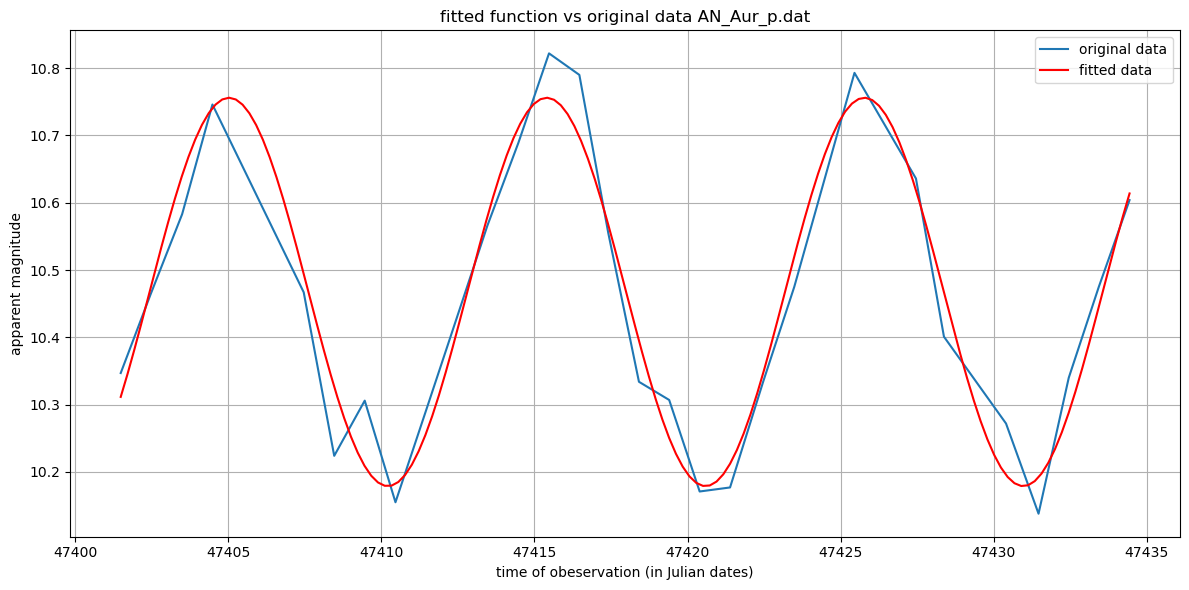

optimal parameters found for CH_Cas_p.dat:
Amplitude/Variation -0.45 mag 
Period  15.01 days 
y-axis offset  11.04 mag


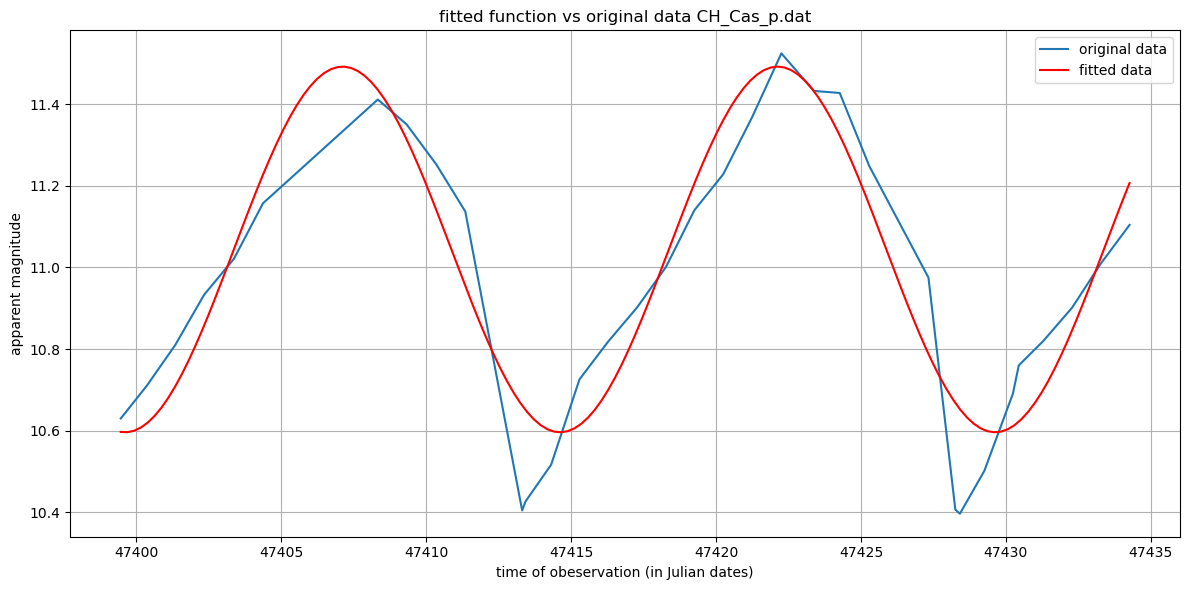

optimal parameters found for ER_Aur_p.dat:
Amplitude/Variation -0.28 mag 
Period  15.65 days 
y-axis offset  11.54 mag


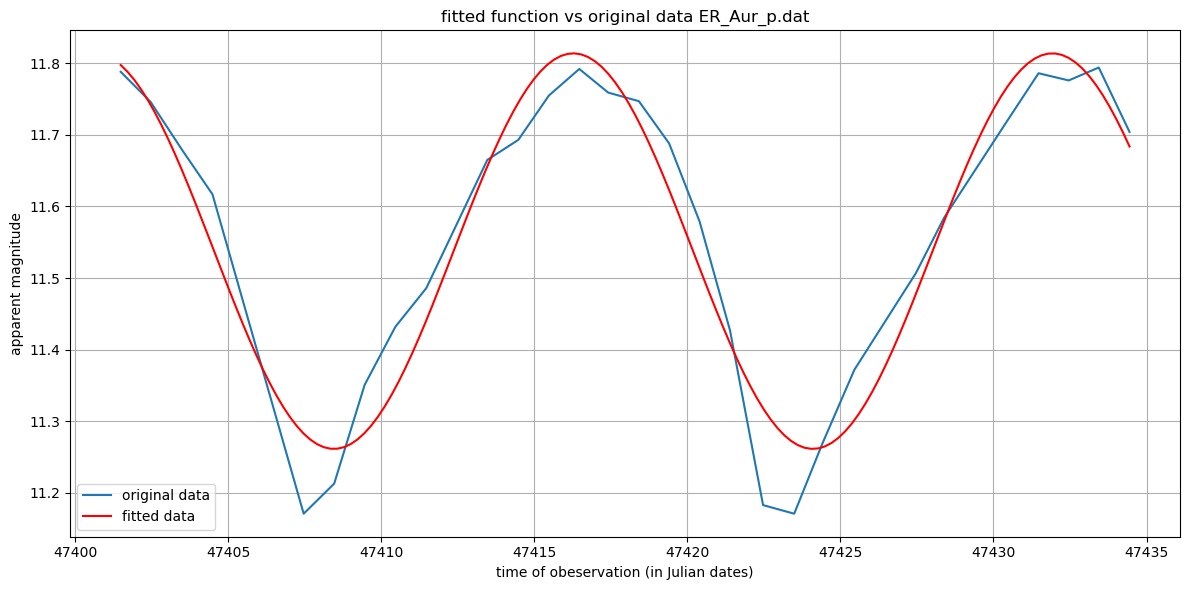

optimal parameters found for FM_Aql_p.dat:
Amplitude/Variation -0.31 mag 
Period  6.07 days 
y-axis offset  8.30 mag


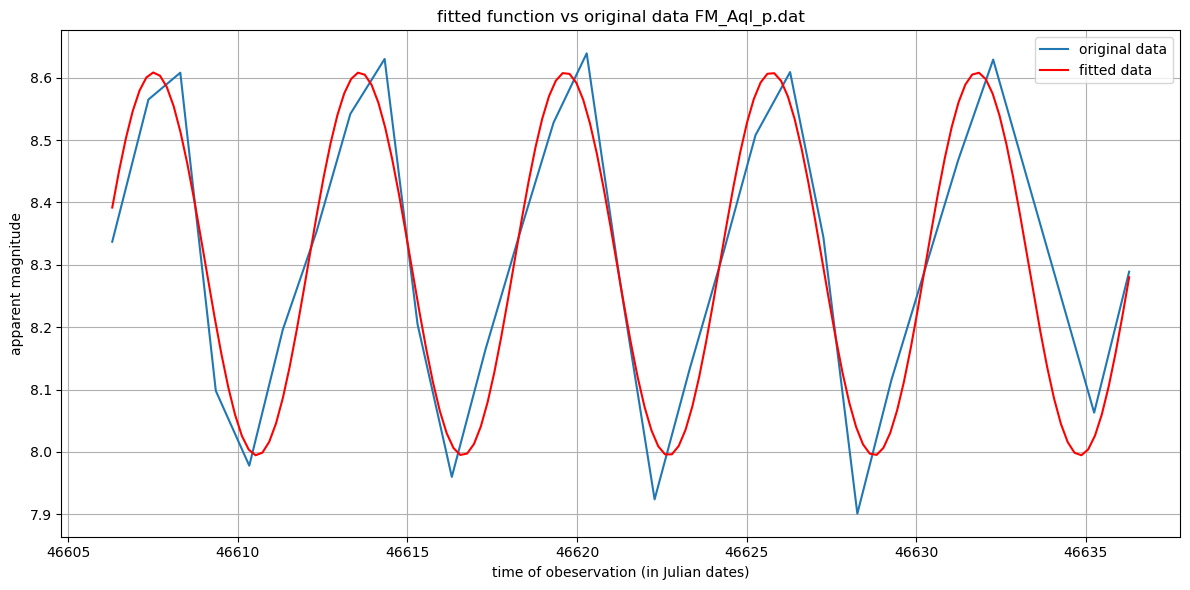

optimal parameters found for GV_Aur_p.dat:
Amplitude/Variation -0.35 mag 
Period  5.23 days 
y-axis offset  12.09 mag


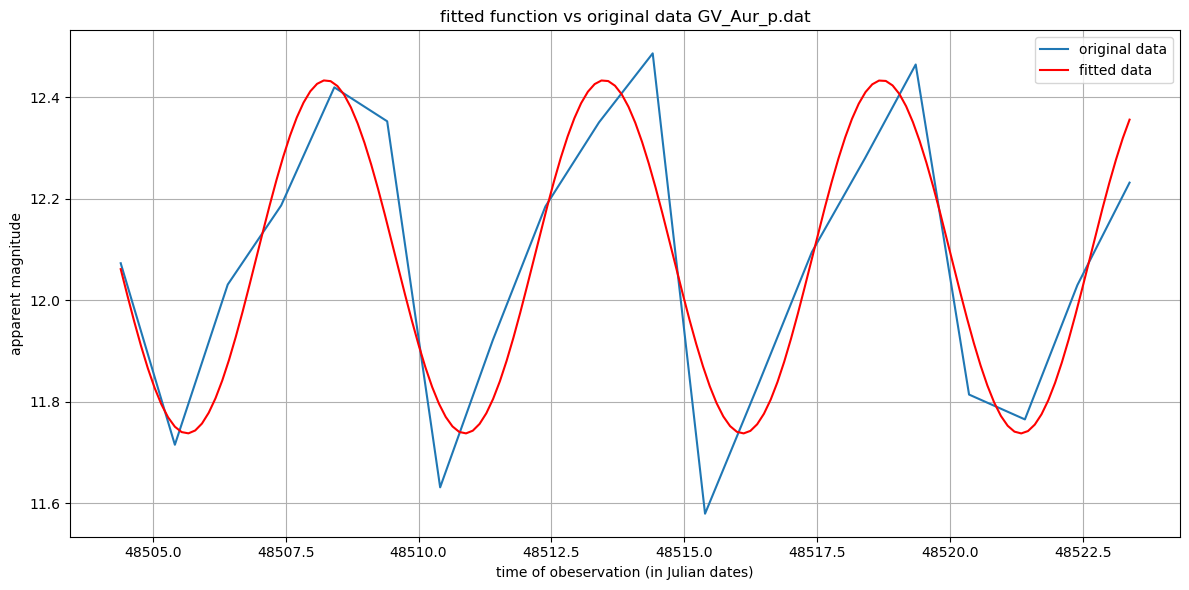

optimal parameters found for IN_Aur_p.dat:
Amplitude/Variation  0.23 mag 
Period  4.90 days 
y-axis offset  13.83 mag


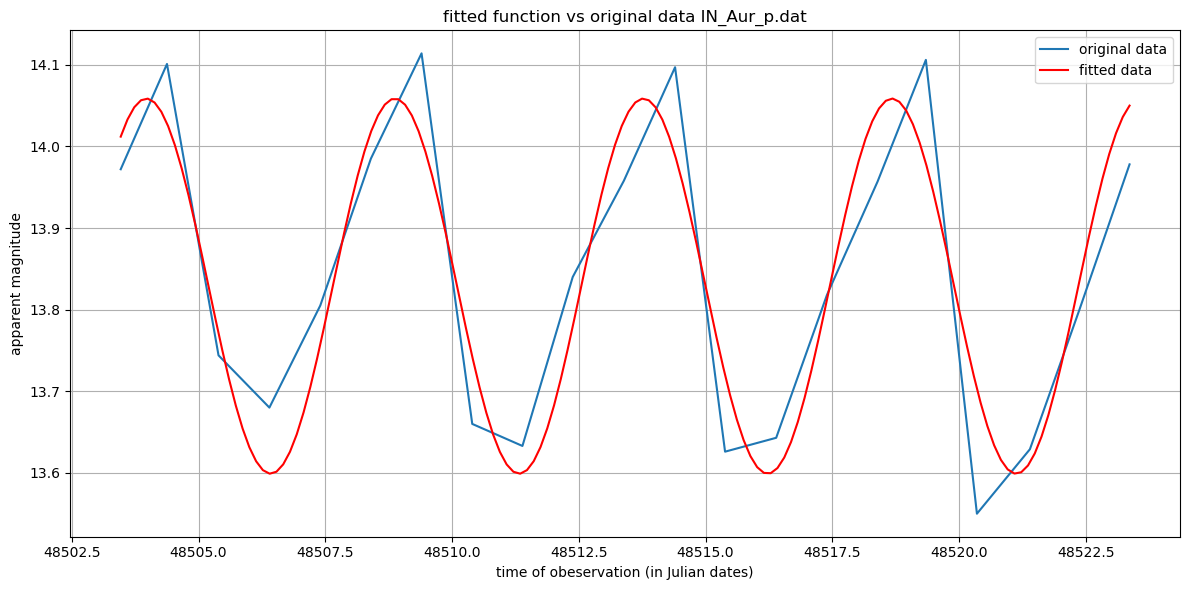

optimal parameters found for KK_Cas_p.dat:
Amplitude/Variation -0.27 mag 
Period  8.18 days 
y-axis offset  11.94 mag


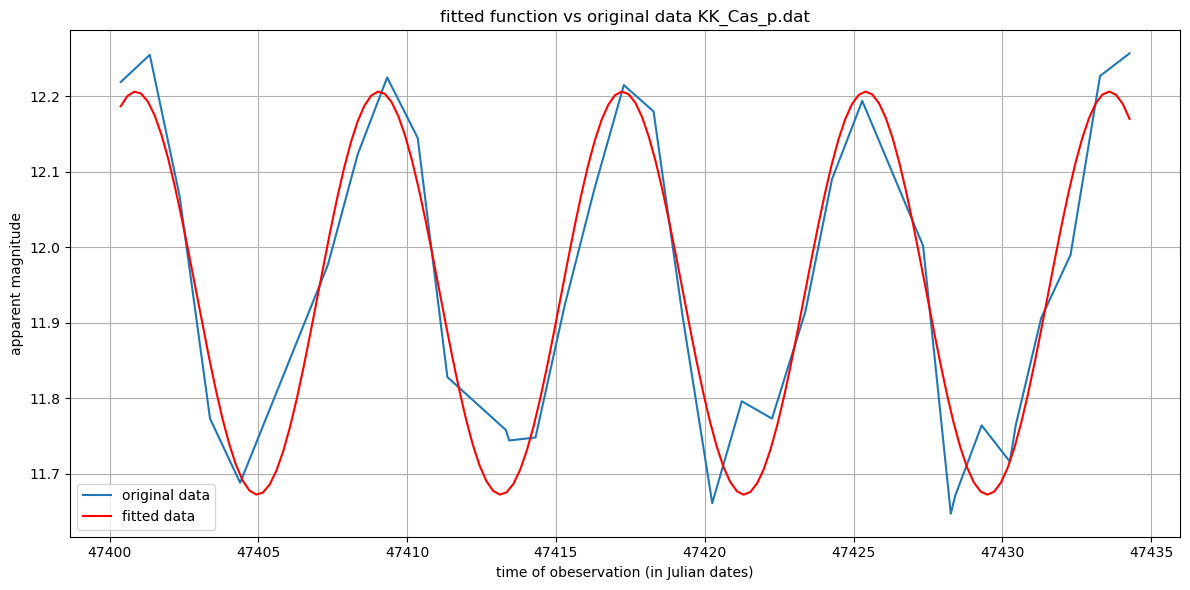

optimal parameters found for RS_Cas_p.dat:
Amplitude/Variation  0.33 mag 
Period  6.39 days 
y-axis offset  9.96 mag


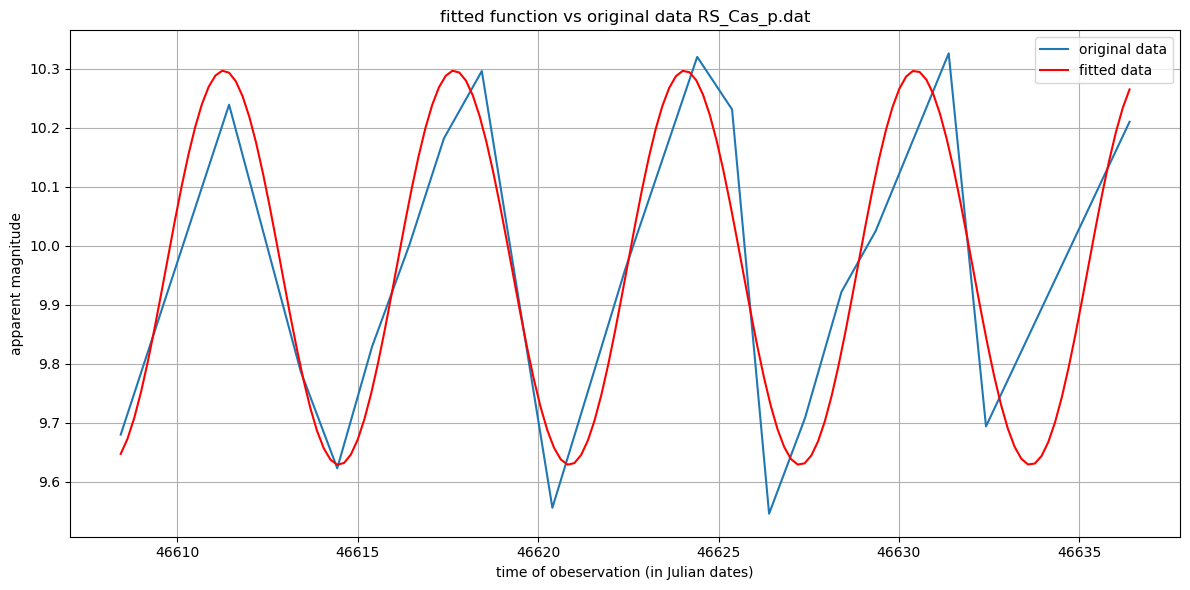

optimal parameters found for RX_Aur_p.dat:
Amplitude/Variation -0.31 mag 
Period  11.63 days 
y-axis offset  7.69 mag


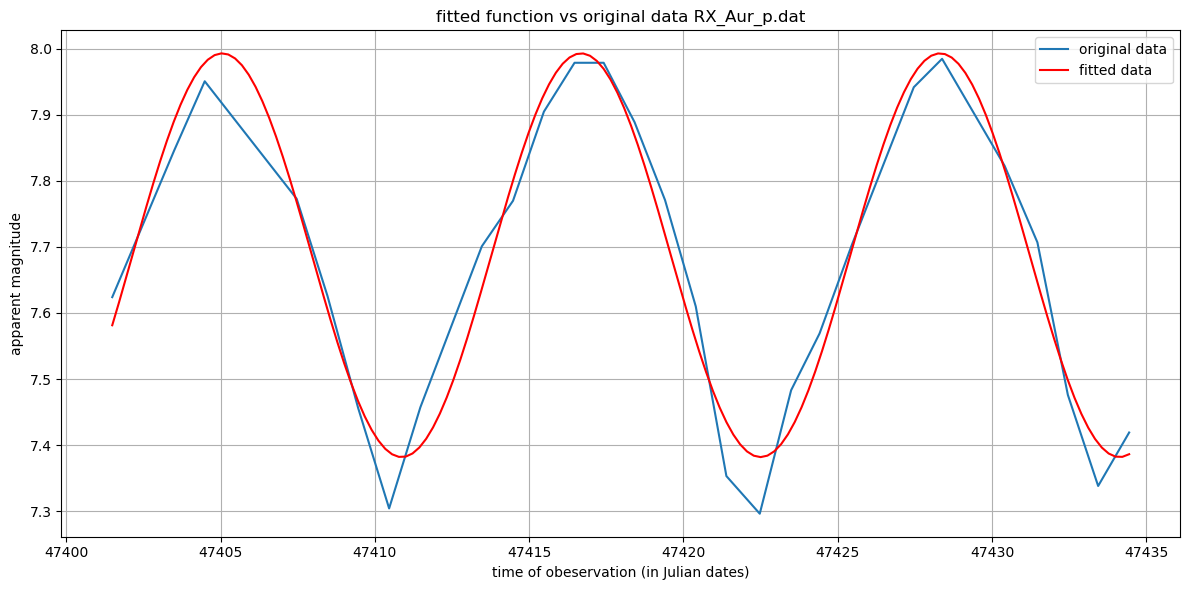

optimal parameters found for RY_Cas_p.dat:
Amplitude/Variation -0.40 mag 
Period  12.10 days 
y-axis offset  9.99 mag


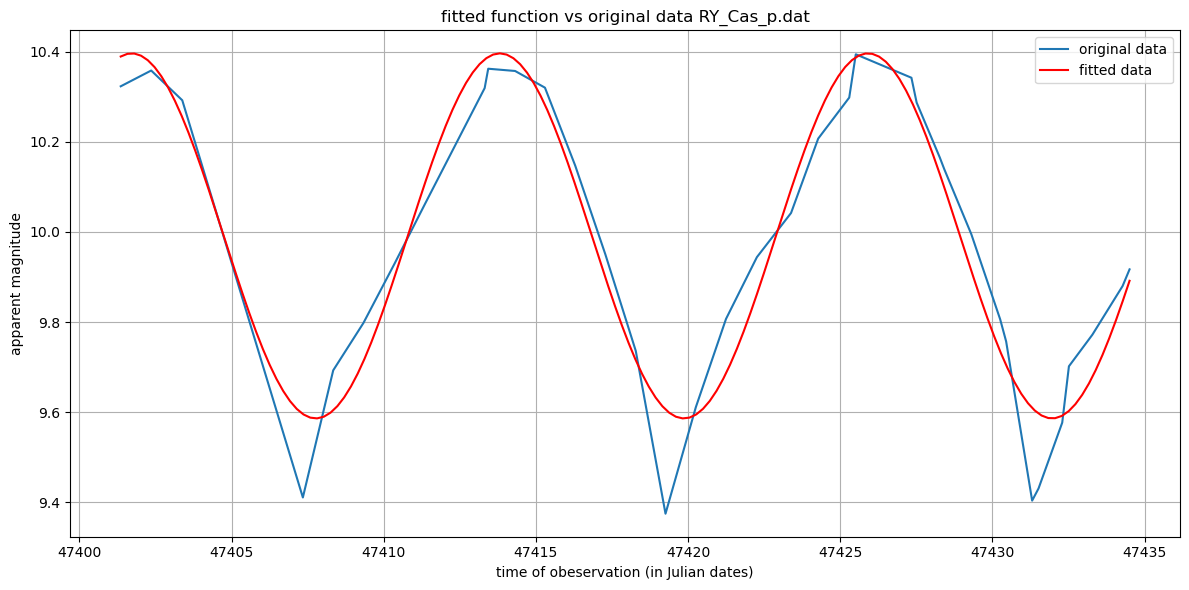

optimal parameters found for SW_Cas_p.dat:
Amplitude/Variation -0.29 mag 
Period  5.40 days 
y-axis offset  9.72 mag


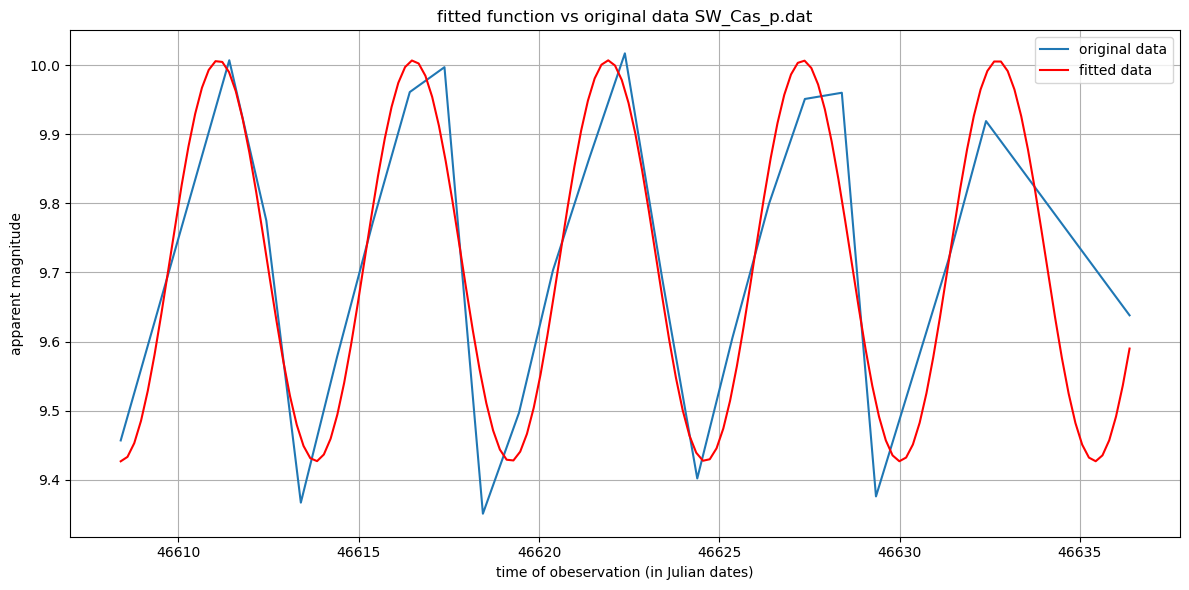

optimal parameters found for SY_Aur_p.dat:
Amplitude/Variation -0.30 mag 
Period  9.99 days 
y-axis offset  9.08 mag


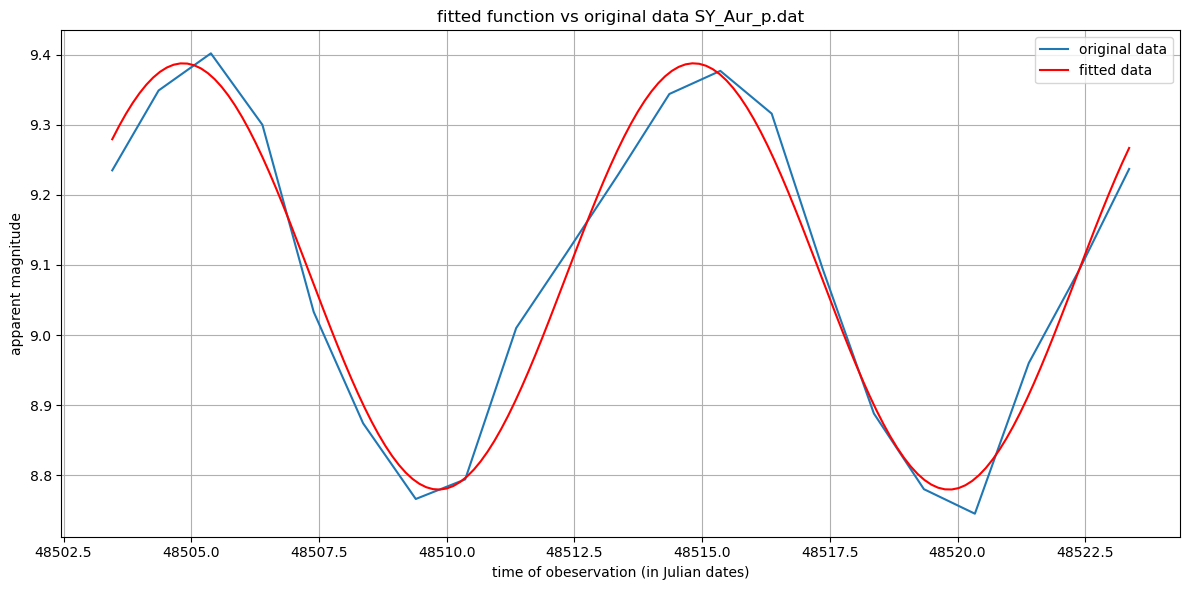

optimal parameters found for SY_Cas_p.dat:
Amplitude/Variation  0.36 mag 
Period  4.05 days 
y-axis offset  9.92 mag


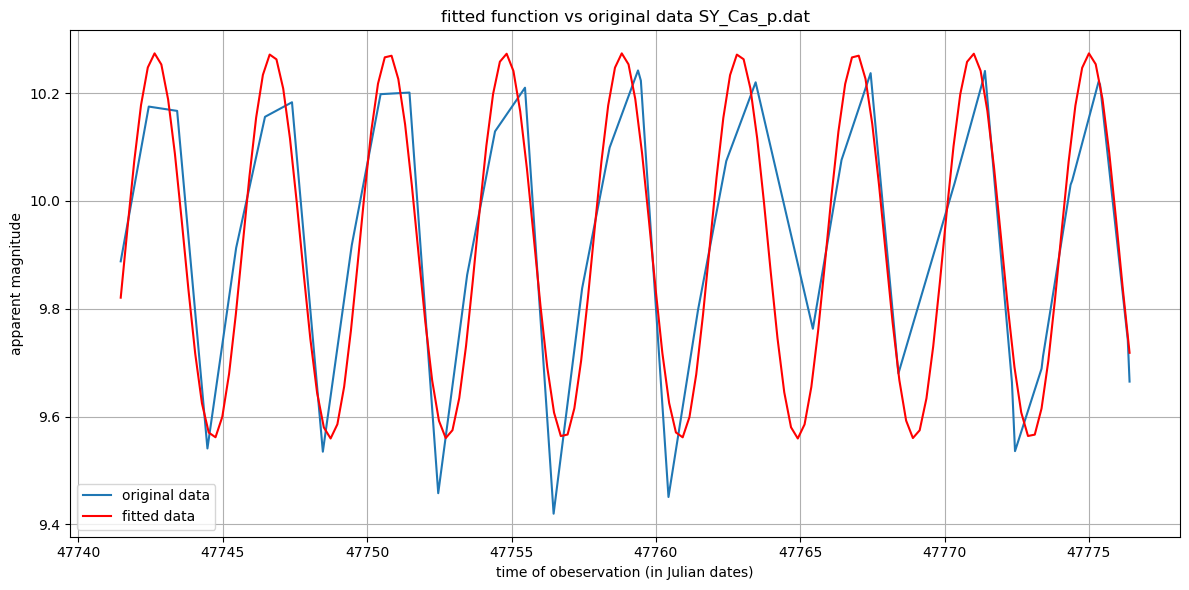

optimal parameters found for SZ_Aql_p.dat:
Amplitude/Variation  0.48 mag 
Period  16.88 days 
y-axis offset  8.67 mag


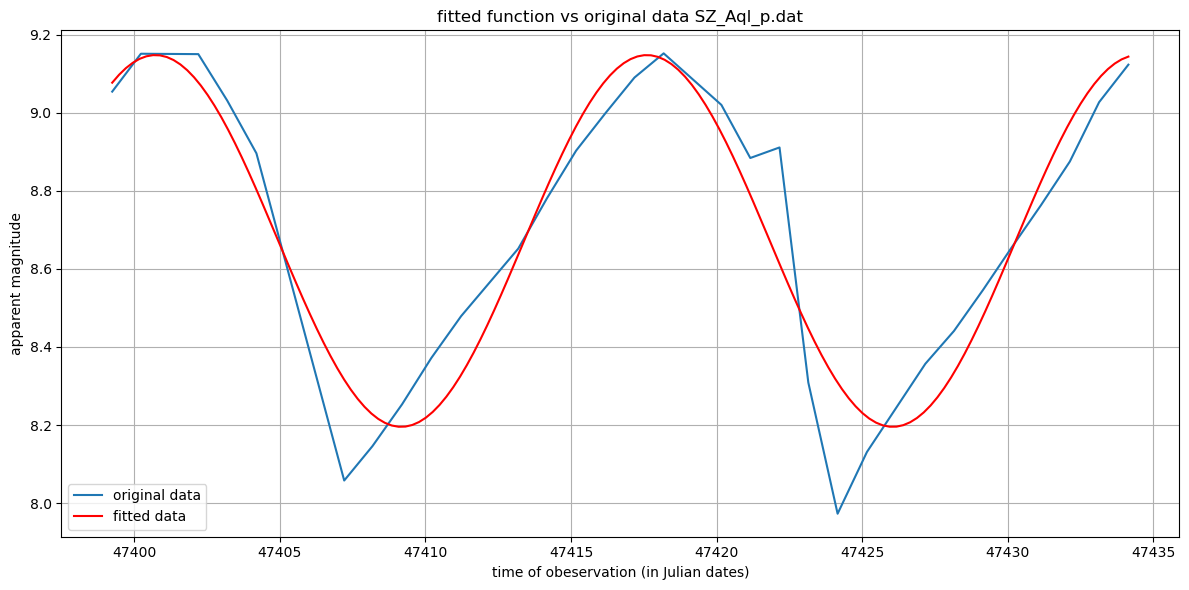

optimal parameters found for TT_Aql_p.dat:
Amplitude/Variation  0.45 mag 
Period  13.65 days 
y-axis offset  7.17 mag


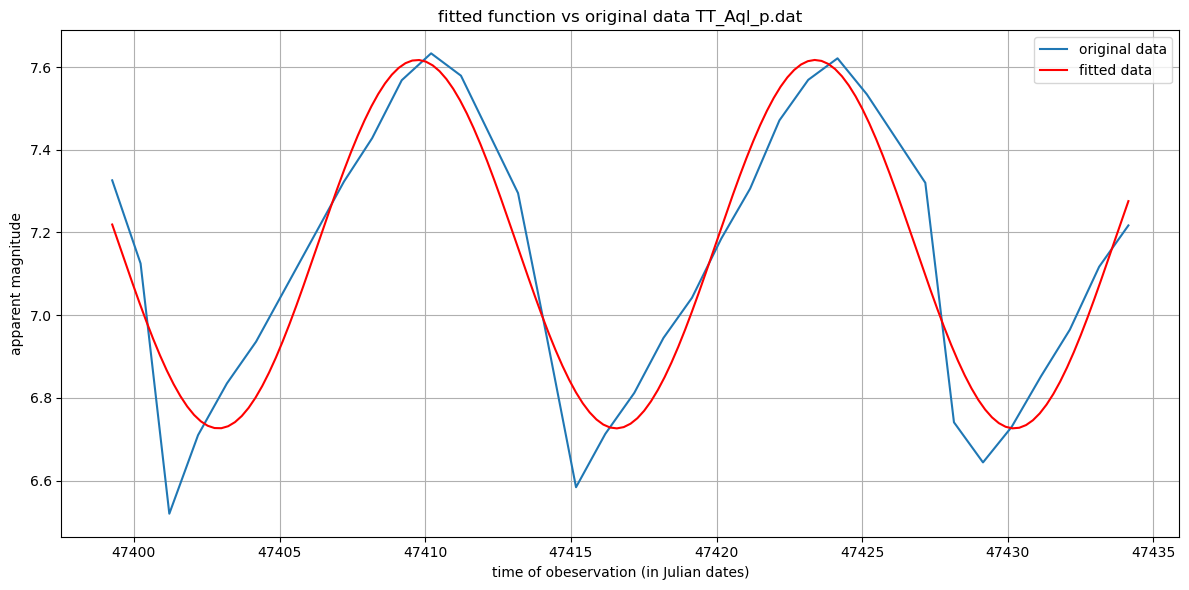

optimal parameters found for U_Aql_p.dat:
Amplitude/Variation  0.34 mag 
Period  7.02 days 
y-axis offset  6.42 mag


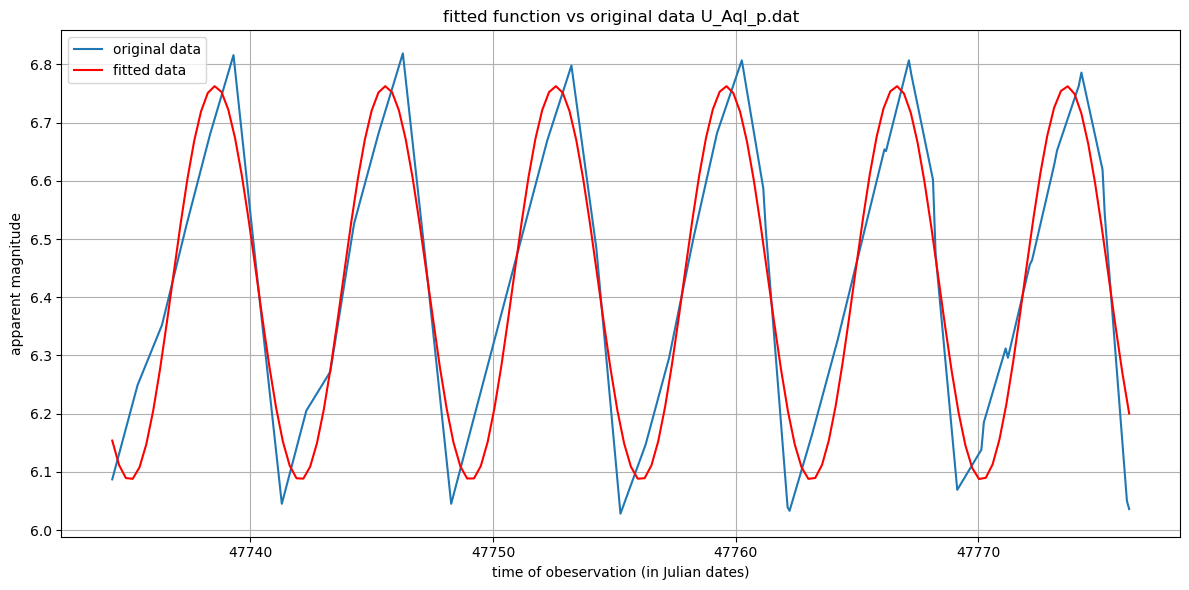

optimal parameters found for VW_Cas_p.dat:
Amplitude/Variation -0.28 mag 
Period  6.05 days 
y-axis offset  10.77 mag


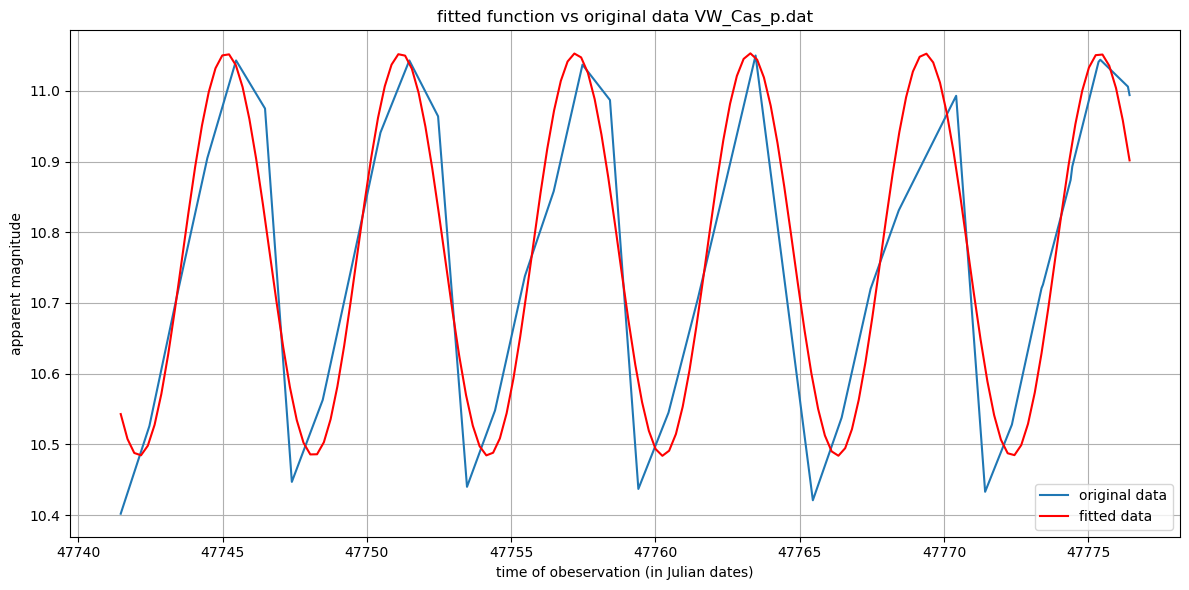

optimal parameters found for YZ_Aur_p.dat:
Amplitude/Variation  0.35 mag 
Period  18.46 days 
y-axis offset  10.39 mag


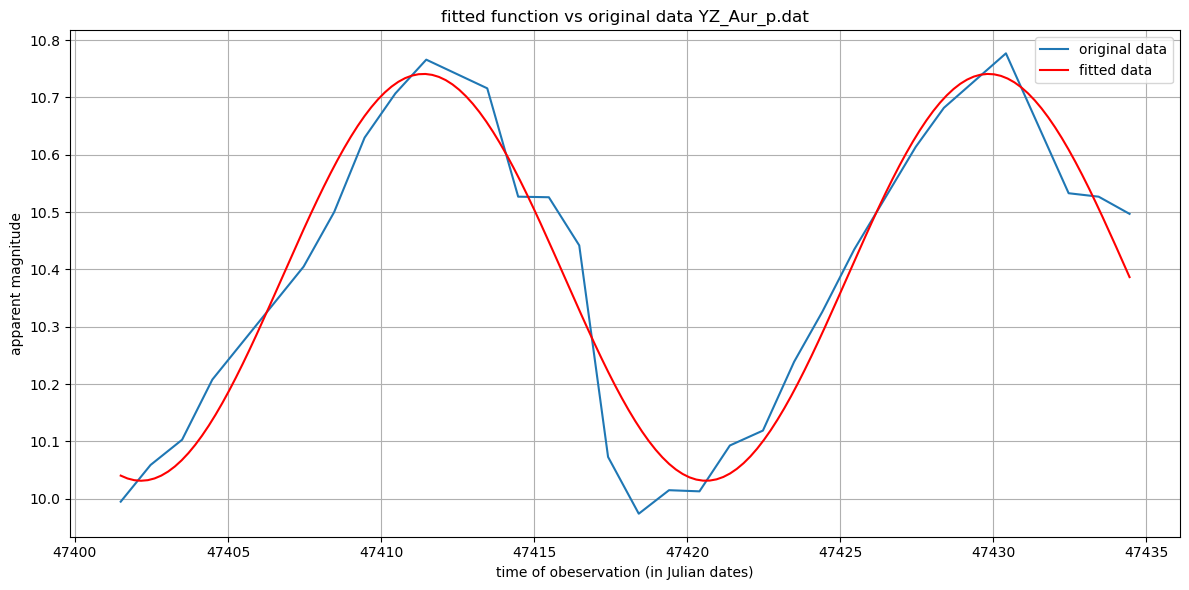

In [30]:
periods = []
for file in files:
    star = cepheid(file) #create an instance of Cepheids class
    star.power_spectrum_peaks() #need to run this method in order for the following methods to work since they borrow results of this method. probably an indication of poor programming skills
#     star.power_spectrum_plot() #can plot the power spectrum and show the location of the peaks
    periods.append(star.parameter_estimation()[1]) #estimates the best fit parameters
    star.plot() #plots a comparision between the orginal data and the fitted curve